### Урок 1. Основы обучения нейронных сетей

##### 1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. 2. Проведите анализ — что приводит к ухудшению точности нейронной сети? 3. Что приводит к увеличению ее точности?

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [4]:
# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape)

def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

(1797, 64)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

((1203, 64), (594, 64))

In [6]:
# вычисление сигмоид функции
def sigmoid(x):
    x = np.clip(x, a_min=-500, a_max=500)
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [60]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 20

# присваивание случайных весов
np.random.seed(1)
w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

# скорость обучения (learning rate)
learning_rate = 0.1

# количество итераций
num_epochs = 150

# массив для ошибок, чтобы потом построить график
errors = []
metrics = []

# процесс обучения
for i in range(num_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение (back propagation)
    #  с использованием градиентного спуска
    layer2_error = layer2 - y_train  # производная функции потерь
    layer2_grad = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_grad.dot(w1.T)
    layer1_grad = layer1_error * sigmoid_deriv(layer1)
    
    w1 -= layer1.T.dot(layer2_grad) * learning_rate
    w0 -= layer0.T.dot(layer1_grad) * learning_rate
    
    # ошибка модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    
    # метрики качества
    preds = np.argmax(layer2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = (preds == labels).sum() * 100 / len(labels)
    metrics.append(accuracy)

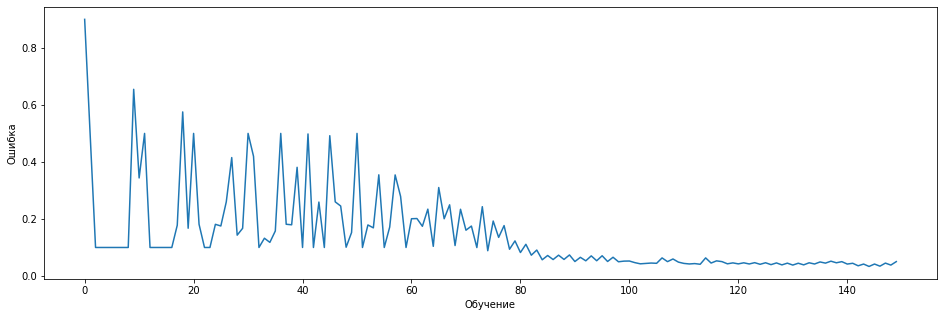

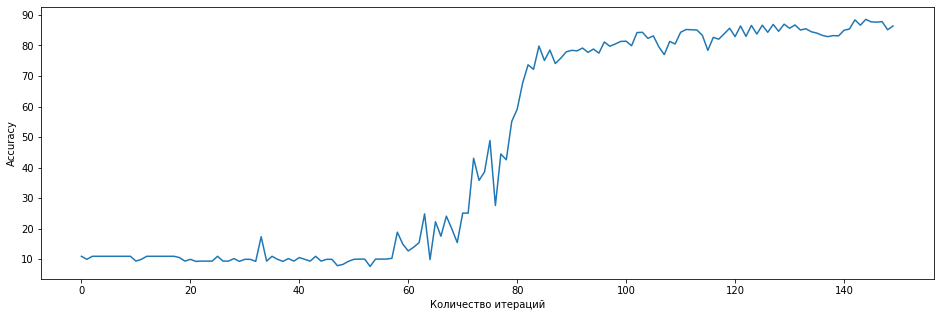

In [61]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [62]:
y_train[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

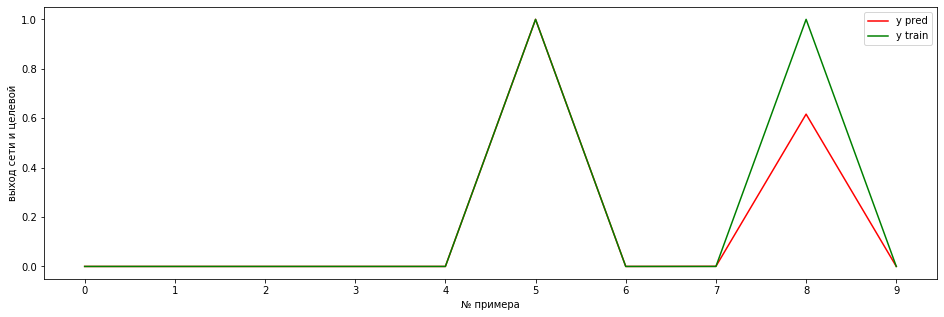

accuracy на обучении 86.37%


In [63]:
N = 10
label = 1
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()
        
print(f"accuracy на обучении {accuracy:.2f}%")

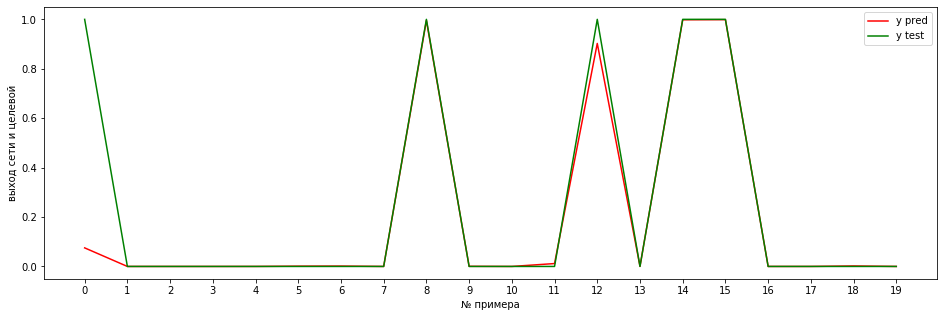

accuracy на тесте 76.77%


In [64]:
# прямое распространение(feed forward)
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
    
    
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

##### Фиксируем количество итераций равным 100 и меняем с шагом 5 число нейронов скрытого слоя

In [71]:
from prettytable import PrettyTable

data = [[5,31.67,37.88], [10,52.20,57.07], [15,65.34,60.61], [20,81.30,79.97]]
df = pd.DataFrame(data, columns=['neuron_numb', 'accuracy на обучении,%', 'accuracy на тесте,%'])

def generate_ascii_table(df):
    x = PrettyTable()
    x.field_names = df.columns.tolist()
    for row in df.values:
        x.add_row(row)
    print(x)
    return x

generate_ascii_table(df)

+-------------+------------------------+---------------------+
| neuron_numb | accuracy на обучении,% | accuracy на тесте,% |
+-------------+------------------------+---------------------+
|     5.0     |         31.67          |        37.88        |
|     10.0    |          52.2          |        57.07        |
|     15.0    |         65.34          |        60.61        |
|     20.0    |          81.3          |        79.97        |
+-------------+------------------------+---------------------+


##### Фиксируем число нейронов скрытого слоя 5 и меняем с шагом 25 количество итераций 

In [70]:
data = [[100,31.67,37.88], [125,45.64,45.45], [150,50.71,49.83], [175,50.71,47.81]]
df = pd.DataFrame(data, columns=['num_epochs', 'accuracy на обучении,%', 'accuracy на тесте,%'])

generate_ascii_table(df)

+------------+------------------------+---------------------+
| num_epochs | accuracy на обучении,% | accuracy на тесте,% |
+------------+------------------------+---------------------+
|   100.0    |         31.67          |        37.88        |
|   125.0    |         45.64          |        45.45        |
|   150.0    |         50.71          |        49.83        |
|   175.0    |         50.71          |        47.81        |
+------------+------------------------+---------------------+


##### Фиксируем оптимальное количество итераций равным 150 и повторно меняем с шагом 5 число нейронов скрытого слоя

In [72]:
data = [[5,50.71,49.83], [10,74.06,73.06], [15,78.64,80.30], [20,86.37,76.97]]
df = pd.DataFrame(data, columns=['neuron_numb', 'accuracy на обучении,%', 'accuracy на тесте,%'])

generate_ascii_table(df)

+-------------+------------------------+---------------------+
| neuron_numb | accuracy на обучении,% | accuracy на тесте,% |
+-------------+------------------------+---------------------+
|     5.0     |         50.71          |        49.83        |
|     10.0    |         74.06          |        73.06        |
|     15.0    |         78.64          |         80.3        |
|     20.0    |         86.37          |        76.97        |
+-------------+------------------------+---------------------+


##### Выводы:
увеличение числа нейронов скрытого слоя до 20 и числа итераций до 150 приводят к улучшению точности, дальнейшее увеличение данных параметров начинает уменьшать точность